<a href="https://colab.research.google.com/github/zharfanw/zhongshan_dsp_python/blob/main/9_Application_of_DFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>9. Application of DFT</h1>

In [1]:
from os import confstr
import numpy as np
import matplotlib.pyplot as plt

## 9.0 Necessary Program For this topic

In [2]:
# Generate 30 random integers between 0 and 99 (inclusive)
random_sequence = np.random.randint(0, 20, 40)

# Plot the sequence
# plt.stem(random_sequence, linefmt='b-', markerfmt='bo', basefmt=" ")
# plt.title("Random Discrete Sequence")
# plt.xlabel("Index")
# plt.ylabel("Value")
# plt.show()

In [3]:
# Define the length of the sequence
def triangle_sequence(N):
  # Create the triangle sequence
  triangle_sequence = np.zeros(N)
  for i in range(N):
      triangle_sequence[i] = i if i <= N // 2 else N - 1 - i
  return triangle_sequence

# # Plot the sequence
# plt.stem(triangle_sequence(5), linefmt='b-', markerfmt='bo', basefmt=" ")
# plt.title("Triangle Discrete Sequence (7 Points)")
# plt.xlabel("Index")
# plt.ylabel("Value")
# plt.show()

# 9.1 Convolution with DTFT

P

In [4]:
# Function of Linear convolution with DFT
def linear_convolution_dft(x, h):
    # Get length of Both Signal x, and h
    L = len(x)
    M = len(h)
    N = L + M - 1  # Add Length for zero padding

    # Zero-padding
    x_padded = np.pad(x, (0, N - L), mode='constant')
    h_padded = np.pad(h, (0, N - M), mode='constant')

    # DFT for both signal x,h --> X,H
    X = np.fft.fft(x_padded)
    H = np.fft.fft(h_padded)

    # Multiply Both X,H -> Y
    Y = X * H

    # Inverse DFT Y -> y
    y = np.fft.ifft(Y)

    return np.real(y)


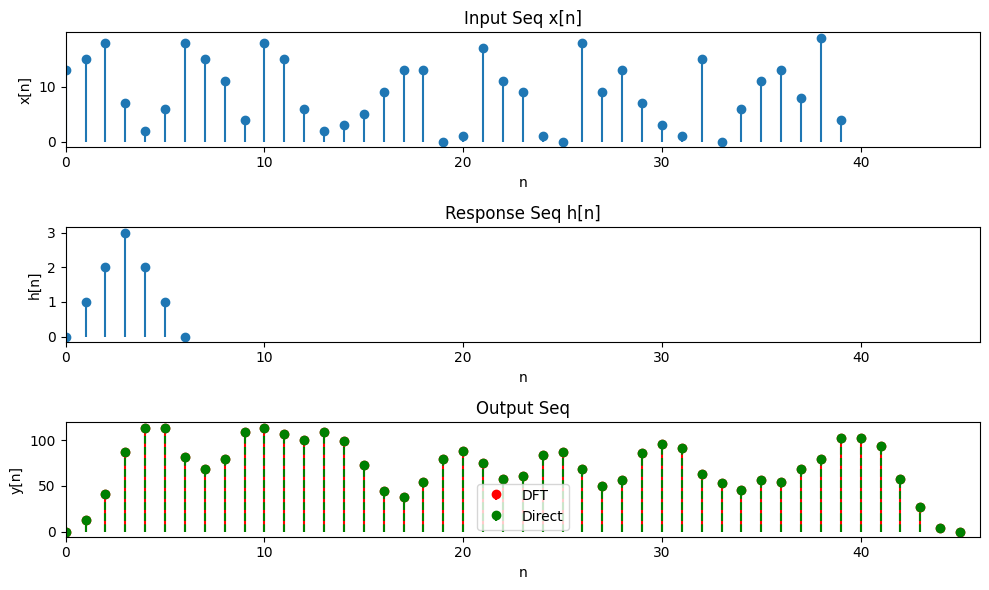

In [5]:
# Sample of Sequence Signal
# x = [1, 2, 3, 4]  # Input Seq
# h = [1, -1, 1]    # Response Seq
x = np.random.randint(0, 20, 40)
h = triangle_sequence(7)

# Linear Convolution by Numpy Library
y_direct = np.convolve(x, h)

# Linear Convolution by DFT
y_dft = linear_convolution_dft(x, h)

# Plot hasil
plt.figure(figsize=(10, 6))

# Plot Input Seq
plt.subplot(3, 1, 1)
plt.stem(x, basefmt=" ")
plt.title("Input Seq x[n]")
plt.xlabel("n")
plt.ylabel("x[n]")
plt.xlim(0,len(y_direct))

# Plot Impulse Response
plt.subplot(3, 1, 2)
plt.stem(h, basefmt=" ")
plt.title("Response Seq h[n]")
plt.xlabel("n")
plt.ylabel("h[n]")
plt.xlim(0,len(y_direct))

# Plot Output Sequence
plt.subplot(3, 1, 3)
plt.stem(y_dft, linefmt='r-', markerfmt='ro', basefmt=" ", label="DFT")
plt.stem(y_direct, linefmt='g--', markerfmt='go', basefmt=" ", label="Direct")
plt.title("Output Seq")
plt.xlabel("n")
plt.ylabel("y[n]")
plt.xlim(0,len(y_direct))
plt.legend()

plt.tight_layout()
plt.show()


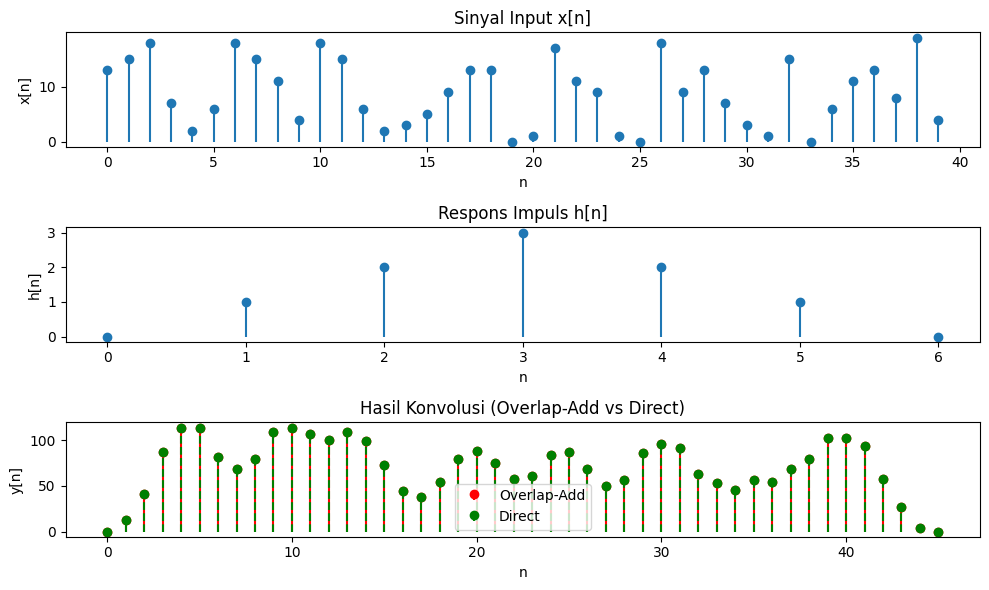

In [6]:
# Perbaikan logika untuk Overlap-Add Convolution
def overlap_add_convolution_fixed_v2(x, h):
    L = len(h)  # Panjang respons impuls
    block_size = L  # Panjang blok input
    N = 2**int(np.ceil(np.log2(L + block_size - 1)))  # Panjang DFT (optimal untuk FFT)

    # Zero-pad h ke panjang N
    H = np.fft.fft(np.pad(h, (0, N - L), 'constant'))

    # Hasil akhir
    result_length = len(x) + len(h) - 1
    result = np.zeros(result_length)

    # Proses blok sinyal input
    for i in range(0, len(x), block_size):
        block = x[i : i + block_size]  # Ambil blok sinyal
        block_padded = np.pad(block, (0, N - len(block)), 'constant')  # Zero-pad blok

        # DFT, perkalian di frekuensi, dan IDFT
        X = np.fft.fft(block_padded)
        Y = np.fft.ifft(X * H)

        # Tambahkan hasil ke sinyal keluaran (Overlap-Add)
        start = i
        end = min(i + N, result_length)
        result[start:end] += np.real(Y[: end - start])

    return result

# Konvolusi menggunakan metode Overlap-Add yang diperbaiki
y_overlap_add_fixed_v2 = overlap_add_convolution_fixed_v2(x, h)

# Plot hasil
plt.figure(figsize=(10, 6))

# Plot sinyal masukan
plt.subplot(3, 1, 1)
plt.stem(x, basefmt=" ")
plt.title("Sinyal Input x[n]")
plt.xlabel("n")
plt.ylabel("x[n]")

# Plot respons impuls
plt.subplot(3, 1, 2)
plt.stem(h, basefmt=" ")
plt.title("Respons Impuls h[n]")
plt.xlabel("n")
plt.ylabel("h[n]")

# Plot hasil konvolusi
plt.subplot(3, 1, 3)
plt.stem(y_overlap_add_fixed_v2, linefmt='r-', markerfmt='ro', basefmt=" ", label="Overlap-Add")
plt.stem(y_direct, linefmt='g--', markerfmt='go', basefmt=" ", label="Direct")
plt.title("Hasil Konvolusi (Overlap-Add vs Direct)")
plt.xlabel("n")
plt.ylabel("y[n]")
plt.legend()

plt.tight_layout()
plt.show()


# 9.2 Spectral Estimation


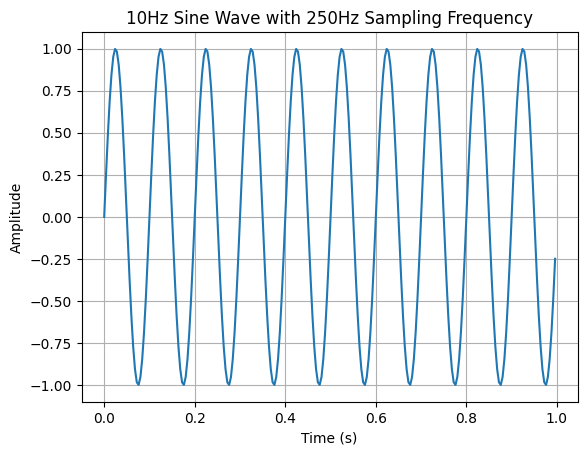

In [7]:
# prompt: create 10Hz sinewave with 250Hz fs

import numpy as np
import matplotlib.pyplot as plt

# Parameters
f_s = 250  # Sampling frequency (Hz)
f_0 = 10   # Frequency of sine wave (Hz)
duration = 1  # Duration of the signal (seconds)

# Time vector
t = np.arange(0, duration, 1/f_s)

# Generate sine wave
sine_wave = np.sin(2 * np.pi * f_0 * t)

# Plot the sine wave
plt.plot(t, sine_wave)
plt.title('10Hz Sine Wave with 250Hz Sampling Frequency')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

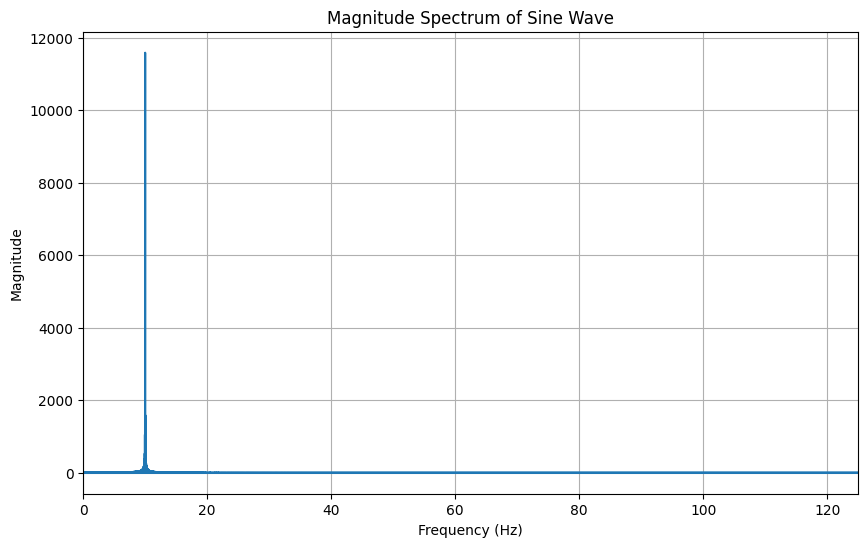

In [8]:
# prompt: spectral analysis dengan Nfft = 2*nextpow2(N)

import numpy as np
import matplotlib.pyplot as plt

# ... (your existing code)

# 9.2 Spectral Estimation

# Parameters
f_s = 250  # Sampling frequency (Hz)
f_0 = 10   # Frequency of sine wave (Hz)
duration = 100  # Duration of the signal (seconds)

# Time vector
t = np.arange(0, duration, 1/f_s)

# Generate sine wave
sine_wave = np.sin(2 * np.pi * f_0 * t)

# Calculate the DFT
N = len(sine_wave)
Nfft = 2**int(np.ceil(np.log2(N))) #Nfft = 2*nextpow2(N)
X = np.fft.fft(sine_wave, Nfft)

# Calculate the frequencies corresponding to the DFT coefficients
f = np.fft.fftfreq(Nfft, 1/f_s)

# Calculate the magnitude spectrum
magnitude_spectrum = np.abs(X)

# Plot the magnitude spectrum
plt.figure(figsize=(10, 6))
plt.plot(f, magnitude_spectrum)
plt.title('Magnitude Spectrum of Sine Wave')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, f_s/2)  # Display only positive frequencies
plt.grid(True)
plt.show()

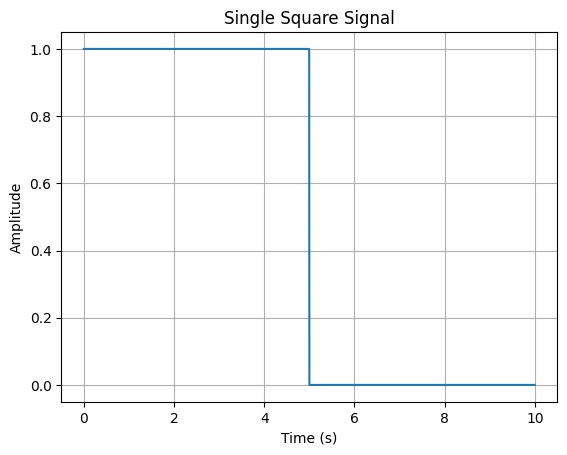

<ipython-input-9-1830e257996a>:36: RuntimeWarning: divide by zero encountered in log10
  magnitude_spectrum = 20 * np.log10(np.abs(X))


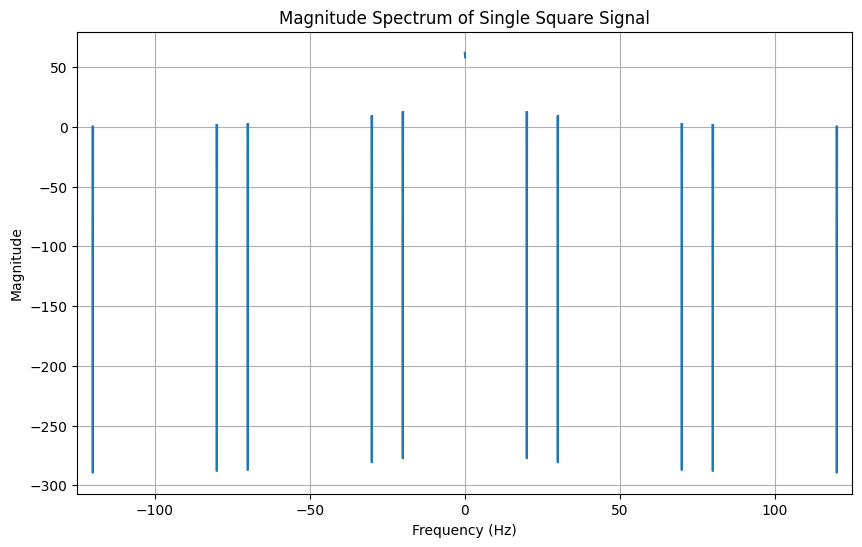

In [9]:
# prompt: create fft with single square signal, but not periodic

import numpy as np
import matplotlib.pyplot as plt

# Generate a single square signal (non-periodic)
def square_signal(duration, f_s, f_0):
    t = np.arange(0, duration, 1/f_s)
    signal = np.zeros_like(t)
    signal[t < duration / 2] = 1  # Square pulse for first half of the duration
    return t, signal

# Parameters
f_s = 250  # Sampling frequency (Hz)
f_0 = 10  # Signal frequency (Hz) - not really relevant for a single square pulse
duration = 10  # Duration of the signal (seconds)


# Generate and plot
t, square_wave = square_signal(duration, f_s, f_0)
plt.plot(t, square_wave)
plt.title('Single Square Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Calculate FFT
N = len(square_wave)
X = np.fft.fft(square_wave)

# Calculate the frequencies corresponding to the DFT coefficients
f = np.fft.fftfreq(N, 1/f_s)

# Calculate the magnitude spectrum
magnitude_spectrum = 20 * np.log10(np.abs(X))

# # Convert magnitude to dB
# magnitude_db = 20 * np.log10(np.abs(W))

# Plot the magnitude spectrum
plt.figure(figsize=(10, 6))
plt.plot(f, magnitude_spectrum)
plt.title('Magnitude Spectrum of Single Square Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(-f_s/2, f_s/2)  # Display only positive frequencies
plt.grid(True)
plt.show()

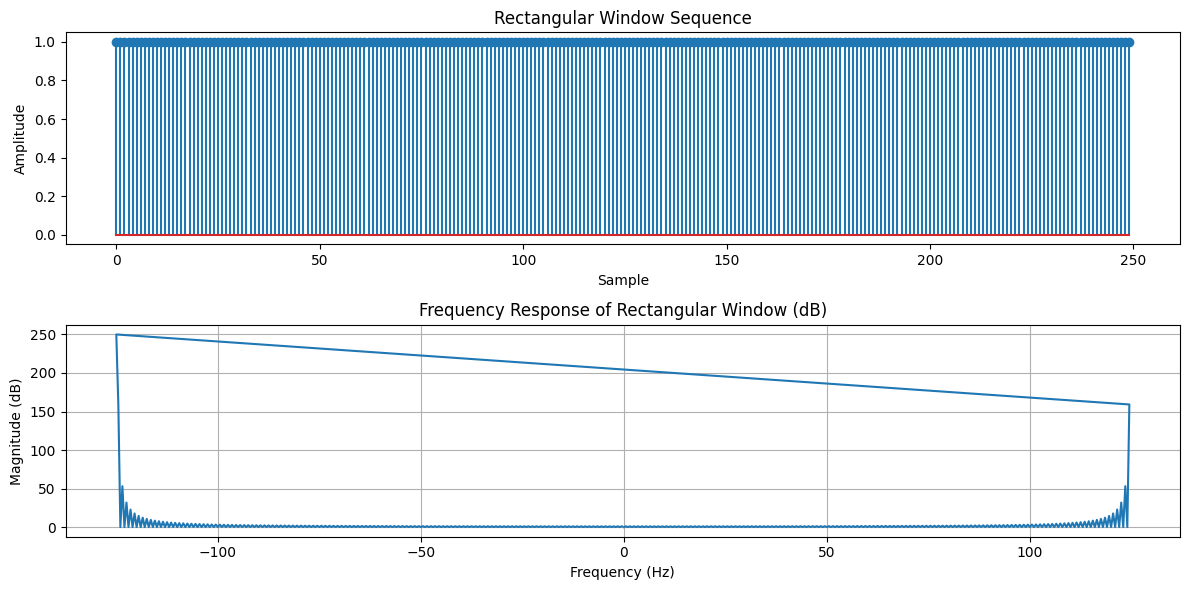

In [10]:
# prompt: create 250 samples rectangular window sequence and its frequency response in db, stem plot it sequence, plot freq response the zero in center

import numpy as np
import matplotlib.pyplot as plt

def rectangular_window(N):
  """Generates a rectangular window sequence."""
  return np.ones(N)

def frequency_response(window, fs):
  """Calculates the frequency response of a window."""
  N = len(window)
  W = np.fft.fft(window, 2 * N)  # Zero-padding for better visualization
  freq = np.fft.fftfreq(2 * N, 1/fs)
  # magnitude_db = 20 * np.log10(np.abs(W))
  magnitude_db = np.abs(W)
  return freq, magnitude_db


# Parameters
fs = 250  # Sampling frequency
N = 250  # Window length

# Generate rectangular window
window = rectangular_window(N)

# Calculate frequency response
freq, magnitude_db = frequency_response(window, fs)

# Plot
plt.figure(figsize=(12, 6))

# Stem plot of the window sequence
plt.subplot(2, 1, 1)
plt.stem(window)
plt.title("Rectangular Window Sequence")
plt.xlabel("Sample")
plt.ylabel("Amplitude")


# Plot frequency response with zero at the center
plt.subplot(2, 1, 2)
plt.plot(freq, np.fft.fftshift(magnitude_db)) # Zero in the center
plt.title("Frequency Response of Rectangular Window (dB)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.grid(True)

plt.tight_layout()
plt.show()

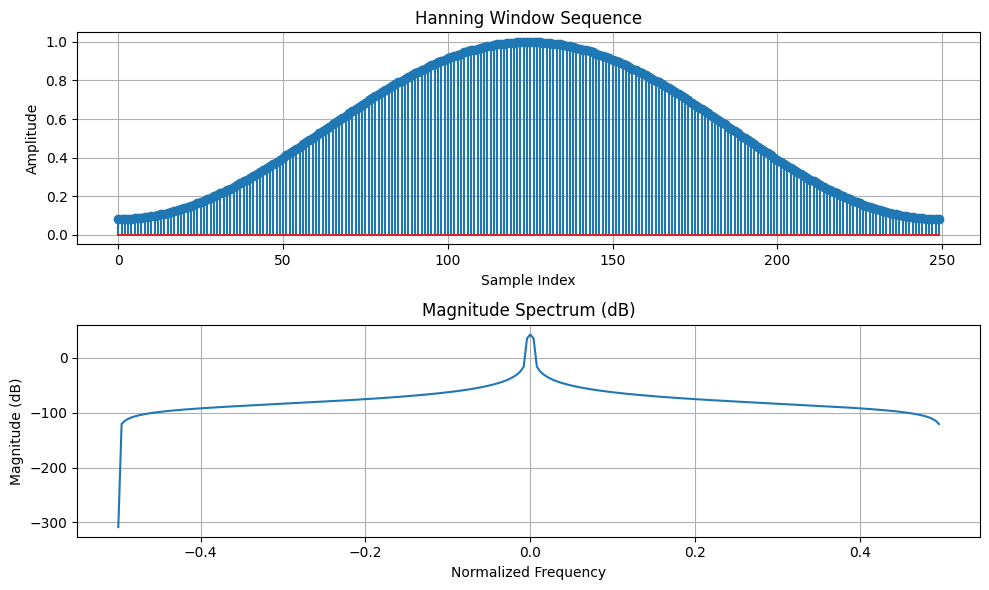

In [11]:
# prompt: create 250 samples hanning sequence with formula w[n] = a + (1-a)cos((2*pi*n)/(N-1)) and its frequency response in db, stem plot it sequence, plot freq response the zero in center

import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 250  # Number of samples
a = 0.54  # Parameter 'a' in the Hanning window formula

# Generate Hanning window sequence
n = np.arange(N)
w = a + (1 - a) * np.cos((2 * np.pi * n) / (N - 1) + np.pi)

# Calculate the frequency response
W = np.fft.fft(w)
freq = np.fft.fftfreq(N, 1)  # Assuming sampling frequency is 1

# Shift zero frequency to center
W = np.fft.fftshift(W)
freq = np.fft.fftshift(freq)


# Convert magnitude to dB
magnitude_db = 20 * np.log10(np.abs(W))

# Plot the Hanning window sequence (stem plot)
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.stem(n, w)
plt.title('Hanning Window Sequence')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot the magnitude spectrum (dB)
plt.subplot(2, 1, 2)
plt.plot(freq, magnitude_db)
plt.title('Magnitude Spectrum (dB)')
plt.xlabel('Normalized Frequency')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.tight_layout()
plt.show()

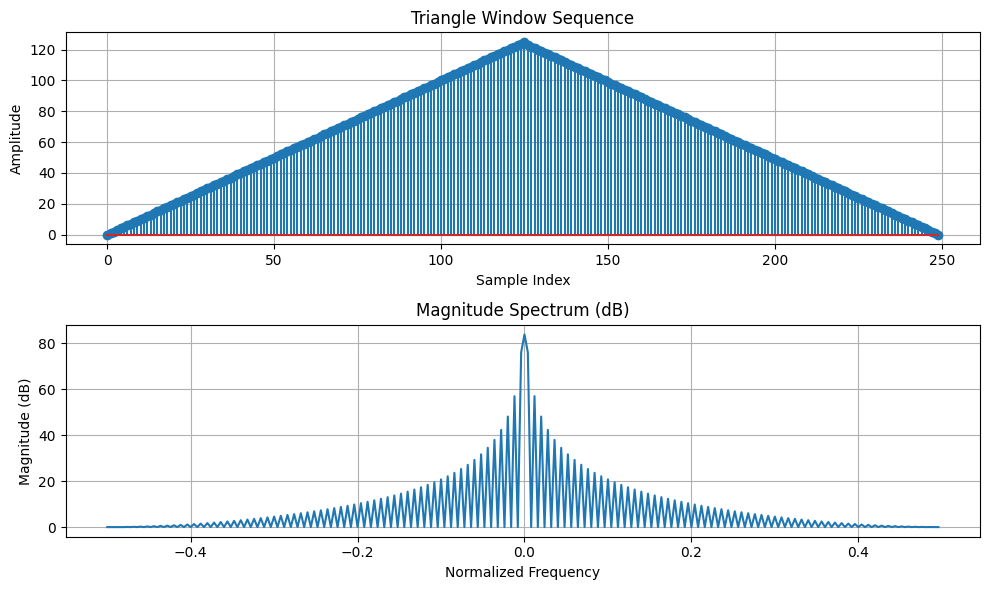

In [12]:
# prompt: create 250 samples single triangle signal and its frequency response in db, stem plot it sequence, plot freq response the zero in center

import numpy as np
import matplotlib.pyplot as plt

# Generate a single triangle signal
def triangle_signal(N):
    triangle_seq = np.zeros(N)
    for i in range(N):
        triangle_seq[i] = i if i <= N // 2 else N - 1 - i
    return triangle_seq

# Parameters
N = 250  # Number of samples

# Generate triangle signal
triangle_wave = triangle_signal(N)


# Calculate the frequency response
W = np.fft.fft(triangle_wave)
freq = np.fft.fftfreq(N, 1)  # Assuming sampling frequency is 1

# Shift zero frequency to center
W = np.fft.fftshift(W)
freq = np.fft.fftshift(freq)

# Convert magnitude to dB
magnitude_db = 20 * np.log10(np.abs(W))

# Plot the triangle window sequence (stem plot)
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.stem(np.arange(N), triangle_wave)
plt.title('Triangle Window Sequence')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot the magnitude spectrum (dB)
plt.subplot(2, 1, 2)
plt.plot(freq, magnitude_db)
plt.title('Magnitude Spectrum (dB)')
plt.xlabel('Normalized Frequency')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 9.3 Short-Time Fourier Transform (STFT)


If we Get Example AM of a sinusoid carrier
<br>
$x[n] = \left( 1-cos\frac{2\pi n}{N} \right) cos\;\omega_{0}n$



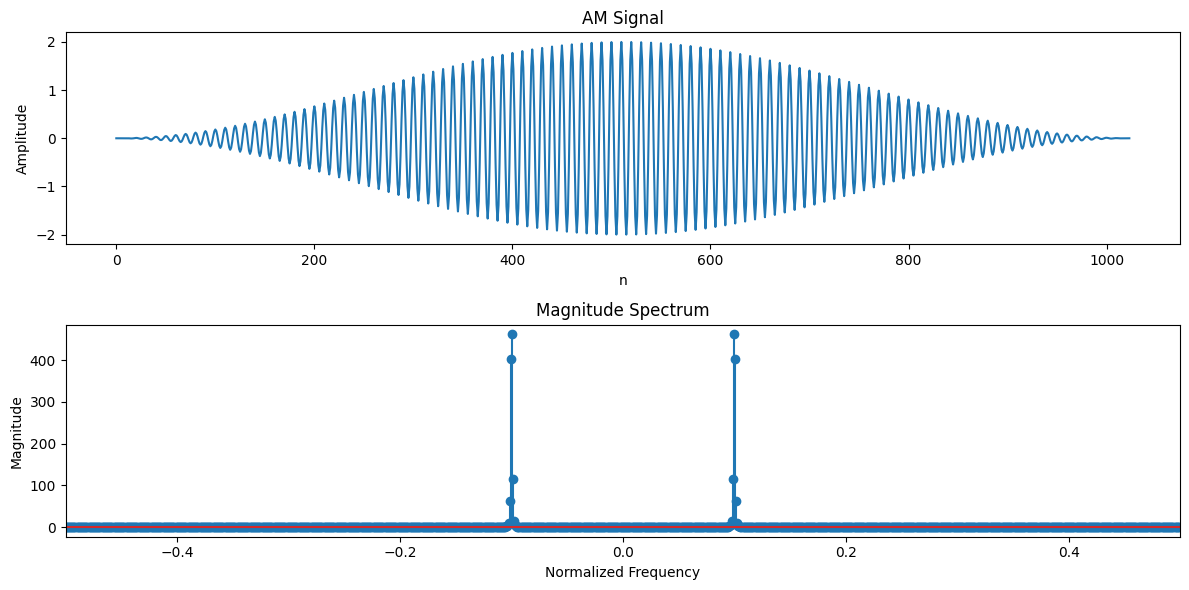

In [43]:
# prompt: Create AN based on this formula $x[n] = \left( 1-cos\frac{2\pi n}{N} \right) cos\;\omega_{0}n$ with N = 1000 and half of Sinewave. and show Spectrum as stem and the signal. and separated signal with vertical line on plot

import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 1024
omega_0 = 0.1 * 2 * np.pi  # Example carrier frequency
n = np.arange(N)

# Generate AM signal
x_n = (1 - np.cos(2 * np.pi * n / N)) * np.cos(omega_0 * n)

# Calculate the DFT
X = np.fft.fft(x_n)

# Calculate frequencies
f = np.fft.fftfreq(N, 1)

# Plot the signal
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(n, x_n)
plt.title('AM Signal')
plt.xlabel('n')
plt.ylabel('Amplitude')


# Plot the magnitude spectrum
plt.subplot(2, 1, 2)
plt.stem(f, np.abs(X))
plt.title('Magnitude Spectrum')
plt.xlabel('Normalized Frequency')
plt.ylabel('Magnitude')
plt.xlim(-0.5, 0.5) # Limit x-axis for better visualization


plt.tight_layout()
plt.show()



*   Fourier transform gives spectrum of an entire sequence
*   How to see a time-varying spectrum ?
* Sometimes we'd rather separate modulation and carrier
<br>
$x[n] = \color{purple}{A[n]}\; cos\;\color{blue}{\omega_0} n $






--> Show STFT of AM Sinusoid Signal

STFT Equation
<br>
$X[k,n_o] = \sum_{n=0}^{N_{FT} - 1} x[n_0 +n] \cdot e^{-j\frac{2\pi n}{N_{FT}}}$

<br>
$X[\color{red}{k},\color{purple}{n_o}] = \sum_ {n=0}^{N_{FT} - 1} \color{green}{x[n_0 +n]} \cdot \color{blue}{e^{-j\frac{2\pi n}{N_{FT}}}}$

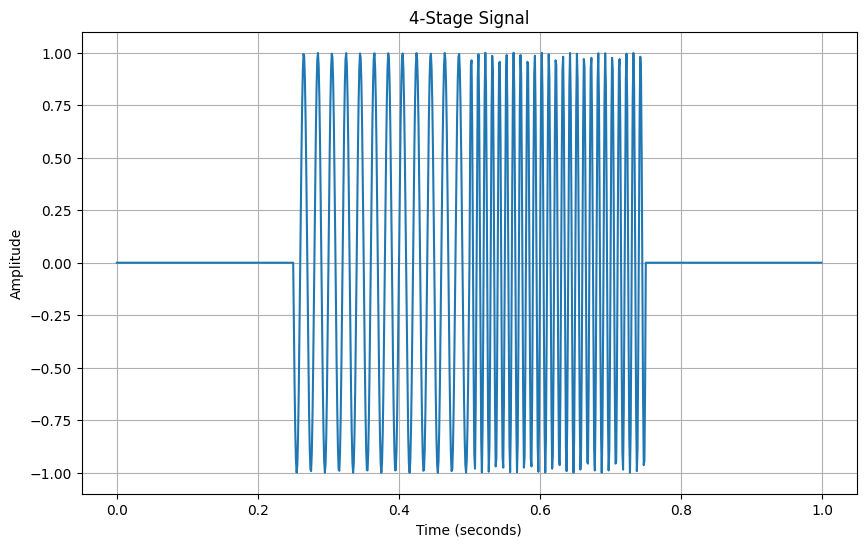

In [50]:
# prompt: create 4 stage signal, zeros signal 50Hz 100Hz and zeros again

import numpy as np
import matplotlib.pyplot as plt

# Sampling frequency
fs = 1024  # Hz

# Signal duration
duration = 1  # seconds

# Time vector
t = np.arange(0, duration, 1/fs)

# Create the 4-stage signal
signal = np.zeros_like(t)

# Stage 1: Zeros
stage1_duration = 0.25  # seconds
signal[:int(stage1_duration * fs)] = 0

# Stage 2: 50 Hz sine wave
stage2_duration = 0.25  # seconds
f2 = 50  # Hz
signal[int(stage1_duration * fs):int((stage1_duration + stage2_duration) * fs)] = np.sin(2 * np.pi * f2 * t[int(stage1_duration*fs):int((stage1_duration+stage2_duration)*fs)])


# Stage 3: 100 Hz sine wave
stage3_duration = 0.25 # seconds
f3 = 100  # Hz
signal[int((stage1_duration + stage2_duration) * fs):int((stage1_duration + stage2_duration + stage3_duration) * fs)] = np.sin(2 * np.pi * f3 * t[int((stage1_duration+stage2_duration)*fs):int((stage1_duration + stage2_duration+stage3_duration)*fs)])


# Stage 4: Zeros
stage4_duration = 0.25  # seconds
signal[int((stage1_duration+stage2_duration+stage3_duration) * fs):] = 0

# Plot the signal
plt.figure(figsize=(10, 6))
plt.plot(t, signal)
plt.title('4-Stage Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()